# IN THIS NOTEBOOK WE GONNA TRAIN A NEURAL NETWORK ON THE MNIST DIGIT DATASET

In [1]:
# Getting the data

In [2]:
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [4]:
# Import statements
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms


In [5]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5)),
                               ])
# Now let's download and load the training dataset
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle=True)

In [6]:
# Building a network(feed-forward)

In [7]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10)
                     )
#The loss function
criterion = nn.CrossEntropyLoss()

#Getting the data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)
# Forward pass and getting our logit
logits = model(images)
# Calculate the loss
loss = criterion(logits, labels)

In [8]:
print(loss)

tensor(2.2939, grad_fn=<NllLossBackward0>)


# Let's Build a model that returns the log-softmax as the output and
# calculate the loss using the negative log likelihood loss

In [11]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1)
                     )

#The Loss
criterion = nn.NLLLoss()
#Our data
images, labels = next(iter(trainloader))
#Flatten the images
images = images.view(images.shape[0], -1)
#Forward pass and logit probabilities
logps = model(images)
#Getting the loss value
loss = criterion(logps, labels)

In [12]:
print(loss)

tensor(2.3077, grad_fn=<NllLossBackward0>)


# calculating the gradients using a backwards pass.

In [15]:
#Build a feed-forward network

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1)
                     )
#Defining the loss function
criterion = nn.NLLLoss()
# Getting required data
images, labels = next(iter(trainloader))
# Let's flatten the images
images = images.view(images.shape[0], -1)
logps = model(images)
loss = criterion(logps, labels)

In [16]:
print("Before backward pass: \n", model[0].weight.grad)

loss.backward()

print("After backward pass:\n", model[0].weight.grad)

Before backward pass: 
 None
After backward pass:
 tensor([[-5.5506e-04, -5.5506e-04, -5.5506e-04,  ..., -5.5506e-04,
         -5.5506e-04, -5.5506e-04],
        [ 4.0418e-04,  4.0418e-04,  4.0418e-04,  ...,  4.0418e-04,
          4.0418e-04,  4.0418e-04],
        [-2.7617e-05, -2.7617e-05, -2.7617e-05,  ..., -2.7617e-05,
         -2.7617e-05, -2.7617e-05],
        ...,
        [ 5.9348e-06,  5.9348e-06,  5.9348e-06,  ...,  5.9348e-06,
          5.9348e-06,  5.9348e-06],
        [-2.3580e-03, -2.3580e-03, -2.3580e-03,  ..., -2.3580e-03,
         -2.3580e-03, -2.3580e-03],
        [ 2.4209e-03,  2.4209e-03,  2.4209e-03,  ...,  2.4209e-03,
          2.4209e-03,  2.4209e-03]])


In [17]:
# Let's train the network

In [18]:
from torch import optim

# Optimize the parameters and setting up the learning rate
optimizer = optim.SGD(model.parameters(), lr = 0.01)


In [19]:
print("Initial weights - ", model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)
#Clear the gradients
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0210,  0.0270, -0.0181,  ..., -0.0201, -0.0145,  0.0301],
        [ 0.0026,  0.0220, -0.0150,  ...,  0.0096,  0.0073,  0.0295],
        [ 0.0032,  0.0233, -0.0332,  ...,  0.0110,  0.0189,  0.0252],
        ...,
        [-0.0140, -0.0320, -0.0330,  ...,  0.0170,  0.0353, -0.0080],
        [ 0.0204,  0.0140, -0.0247,  ..., -0.0304, -0.0112,  0.0160],
        [ 0.0081, -0.0054, -0.0357,  ..., -0.0262,  0.0086,  0.0160]],
       requires_grad=True)
Gradient - tensor([[ 1.0388e-03,  1.0388e-03,  1.0388e-03,  ...,  1.0388e-03,
          1.0388e-03,  1.0388e-03],
        [-3.5102e-05, -3.5102e-05, -3.5102e-05,  ..., -3.5102e-05,
         -3.5102e-05, -3.5102e-05],
        [-3.4152e-03, -3.4152e-03, -3.4152e-03,  ..., -3.4152e-03,
         -3.4152e-03, -3.4152e-03],
        ...,
        [ 4.7617e-04,  4.7617e-04,  4.7617e-04,  ...,  4.7617e-04,
          4.7617e-04,  4.7617e-04],
        [-4.0819e-04, -4.0819e-04, -4.0819e-04,  ..., -4.0819e

In [20]:
optimizer.step()
print('Updated weight', model[0].weight)

Updated weight Parameter containing:
tensor([[ 0.0210,  0.0270, -0.0181,  ..., -0.0201, -0.0145,  0.0301],
        [ 0.0026,  0.0220, -0.0150,  ...,  0.0096,  0.0073,  0.0295],
        [ 0.0033,  0.0234, -0.0332,  ...,  0.0111,  0.0189,  0.0253],
        ...,
        [-0.0140, -0.0320, -0.0330,  ...,  0.0170,  0.0353, -0.0080],
        [ 0.0204,  0.0140, -0.0247,  ..., -0.0304, -0.0112,  0.0160],
        [ 0.0082, -0.0054, -0.0357,  ..., -0.0262,  0.0086,  0.0160]],
       requires_grad=True)


# Implement the training pass for our network

In [21]:
# Real training

In [37]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1)
                     )

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        #Let's fletten the MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        
        #Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    else:
        print(f"Training loss:{running_loss/len(trainloader)}")


Training loss:1.8652393716230575
Training loss:0.825065670237104
Training loss:0.5106232870044485
Training loss:0.423431423347769
Training loss:0.3836213284527569


In [38]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable

In [39]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

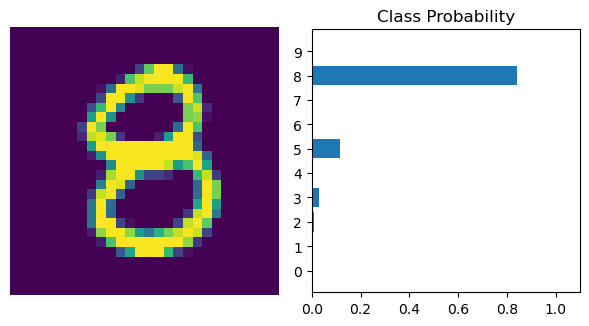

In [41]:
# Checkout our prediction
%matplotlib inline

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps)